Con los datos transformados y depurados, Procederemos a hacer un análisis exploratorio de datos (EDA), centrado en las diversas columnas presentes en nuestros conjuntos de datos. El objetivo principal es identificar métricas clave y valores atípicos que arrojen luz sobre patrones, tendencias y factores destacados en los datos.

Durante este proceso, nos enfocaremos en la generación de gráficos que nos permitan entender mejor la distribución de los datos y las posibles relaciones entre las variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Y_ulta_beauty = pd.read_csv('..\datasets\csv\Y_ulta_beauty.csv')
G_ulta_beauty = pd.read_csv('..\datasets\csv\G_ulta_beauty.csv')
G_ulta_beauty.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
G_ulta_beauty.columns

Index(['user_id', 'business_id', 'stars', 'text', 'year', 'state', 'latitude',
       'longitude', 'source', 'month'],
      dtype='object')

Primeras filas de los datasets de google y de yelp

In [26]:
G_ulta_beauty.head()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
0,1.118232e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Both budget priced and high quality cosmetics ...,2017,AL,33.375896,-86.817683,G,5
1,1.042629e+20,0x88892218e9cd6499:0x421281dcaf386e1d,3,"SOMER IS THE BEST STYLIST THEY HAVE, OTHER STY...",2017,AL,33.375896,-86.817683,G,9
2,1.043726e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Very helpful staff. Everyone seemed knowledge...,2017,AL,33.375896,-86.817683,G,2
3,1.143917e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Fantastic selection and great staff,2017,AL,33.375896,-86.817683,G,3
4,1.090261e+20,0x88892218e9cd6499:0x421281dcaf386e1d,5,Great products!,2016,AL,33.375896,-86.817683,G,12


In [27]:
Y_ulta_beauty.head()

,user_id,business_id,stars,text,year,state,latitude,longitude,source,month
0,dKN5pfsZYMyNXw6QekuYrg,idP674ti6a8yg8z2xFcCgA,1.0,I recently bought $50 worth of hair products I...,2017,AZ,39.987189,-75.403201,Y,9
1,OxPwTirxr6jsthULWBAuZg,idP674ti6a8yg8z2xFcCgA,1.0,Based on other reviews I see I am not the only...,2018,AZ,39.987189,-75.403201,Y,6
2,nAURZM3uxMR1pVpKIav-Iw,idP674ti6a8yg8z2xFcCgA,1.0,I specifically came to this store because it w...,2017,AZ,39.987189,-75.403201,Y,1
3,qYsHVItNC1_WnJGBIx5kXA,idP674ti6a8yg8z2xFcCgA,5.0,Received a great haircut from Jess.\n\nI neede...,2017,AZ,39.987189,-75.403201,Y,2
4,JpE6JdtbkOqXUElu2q28Og,idP674ti6a8yg8z2xFcCgA,1.0,Agree with the other reviews that are unhappy ...,2018,AZ,39.987189,-75.403201,Y,3


### Info

In [13]:
Y_ulta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      2032 non-null   object 
 1   business_id  2032 non-null   object 
 2   stars        2032 non-null   float64
 3   text         2032 non-null   object 
 4   year         2032 non-null   int64  
 5   state        2032 non-null   object 
 6   latitude     2032 non-null   float64
 7   longitude    2032 non-null   float64
 8   source       2032 non-null   object 
 9   month        2032 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 158.9+ KB


El DataFrame cuenta con 2032 entradas y 10 columnas, proporcionando información detallada.
#### Variables Principales:
- **user_id y business_id:** Identificadores de usuario y negocio respectivamente.
- **stars:** Calificación asignada, representada como una calificación asignada por el usuario.
- **text:** Texto asociado a la reseña.

#### Información Temporal:
- **year y month:** Indican el año y el mes de la reseña.

#### Datos Geográficos:
- **state:** Indica el estado asociado a la reseña.
- **latitude y longitude:** Coordenadas geográficas del lugar.

#### Otras Características:
- **source:** Indica la fuente de la reseña en este caso son datos de yelp.

#### Tipos de Datos y No Nulos:
- No hay valores nulos en ninguna de las columnas.
- Se emplean diversos tipos de datos: float64, int64 y object.

#### Tamaño de Memoria:
- El DataFrame utiliza aproximadamente 158.9 KB de memoria.


In [15]:
G_ulta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17188 entries, 0 to 17187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      17188 non-null  float64
 1   business_id  17188 non-null  object 
 2   stars        17188 non-null  int64  
 3   text         8575 non-null   object 
 4   year         17188 non-null  int64  
 5   state        17188 non-null  object 
 6   latitude     17188 non-null  float64
 7   longitude    17188 non-null  float64
 8   source       17188 non-null  object 
 9   month        17188 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


Este DataFrame consta de 17188 entradas y 10 columnas.

#### Variables Principales:
- **user_id y business_id:** Identificadores de usuario y negocio respectivamente.
- **stars:** Calificación asignada, representada como un valor entero.
- **text:** Texto asociado a la reseña. Se observa que hay valores nulos en esta columna.

#### Información Temporal:
- **year y month:** Indican el año y el mes de la reseña.

#### Datos Geográficos:
- **state:** Indica el estado asociado a la reseña.
- **latitude y longitude:** Coordenadas geográficas del lugar.

#### Otras Características:
- **source:** Indica la fuente de la reseña en este caso son datos de google.

#### Tipos de Datos y No Nulos:
- La columna **text** presenta valores nulos (null) en aproximadamente la mitad de las entradas.
- Se emplean diversos tipos de datos: float64, int64 y object.

#### Tamaño de Memoria:
- El DataFrame utiliza aproximadamente 1.3 MB de memoria.




## Estadistíca descriptiva de Yelp

In [5]:
Y_ulta_beauty[['stars','month','year']].describe()

,stars,month,year
count,2032.000000,2032.00000,2032.000000
mean,3.120571,6.60876,2017.009350
std,1.700850,3.52301,2.487074
min,1.000000,1.00000,2007.000000
25%,1.000000,3.00000,2015.000000
50%,3.000000,7.00000,2017.000000
75%,5.000000,10.00000,2019.000000
max,5.000000,12.00000,2022.000000


### Calificaciones (stars)
- La media de las calificaciones es de aproximadamente 3.12, indicando una tendencia hacia el rango medio.
- La desviación estándar de 1.70 sugiere variabilidad en las calificaciones, con cierta dispersión alrededor de la media.
- Las calificaciones varían desde un mínimo de 1 hasta un máximo de 5, reflejando una diversidad de opiniones.

### Mes (month)
- La media del mes es de alrededor de 6.61, sugiriendo una distribución relativamente uniforme a lo largo del año.
- La desviación estándar de 3.52 indica variabilidad en los meses de las observaciones.
- Las observaciones abarcan todos los meses del año, desde enero (1) hasta diciembre (12).

### Año (year)
- La media del año es aproximadamente 2017.01, sugiriendo que las observaciones tienden a distribuirse alrededor de este año.
- La desviación estándar de 2.49 indica variabilidad en los años de las observaciones.
- Las observaciones se extienden desde el año 2007 hasta el año 2022, con el 75% de las observaciones realizadas hasta el año 2019.




## Estadistica descriptiva de Google

In [7]:
G_ulta_beauty[['stars','month','year']].describe()

,stars,month,year
count,17188.000000,17188.000000,17188.000000
mean,4.291773,6.322143,2018.990691
std,1.116941,3.579739,1.153049
min,1.000000,1.000000,2011.000000
25%,4.000000,3.000000,2018.000000
50%,5.000000,6.000000,2019.000000
75%,5.000000,9.000000,2020.000000
max,5.000000,12.000000,2021.000000


### Calificaciones (stars):

- La mayoría de las calificaciones tienden a ser altas, ya que el 75% de ellas están en el rango de 4 a 5.
- La desviación estándar relativamente baja (1.12) indica que las calificaciones están bastante concentradas alrededor de la media.
- Todas las calificaciones tienen un valor máximo de 5, sugiriendo poca variabilidad en las calificaciones máximas.

### Mes (month):

- La media del mes es de aproximadamente 6.32, sugiriendo una distribución uniforme a lo largo de los meses.
- La desviación estándar de 3.58 indica cierta variabilidad en los meses de las observaciones.
- El rango de meses va desde enero (1) hasta diciembre (12), cubriendo todo el año.

### Año (year):

- La mayoría de las observaciones se concentran en los años 2018, 2019 y 2020, ya que el 75% de las observaciones están en este rango.
- La desviación estándar relativamente baja (1.15) indica que los años están bastante concentrados alrededor de la media.
- Las observaciones abarcan desde el año 2011 hasta el año 2021.

En resumen, las calificaciones son mayormente altas y concentradas, los meses muestran cierta variabilidad a lo largo del año, y las observaciones se centran en los años 2018, 2019 y 2020. La baja desviación estándar en las variables sugiere una concentración de datos alrededor de la media.


## Comparación entre Yelp y Google

Al analizar descriptivamente los conjuntos de datos de Yelp y Google, se destaca que los usuarios de Google tienden a otorgar calificaciones más elevadas en comparación con los usuarios de Yelp. Además, se observa que la cantidad de reseñas en Google supera a la registrada en Yelp.

Es relevante señalar que los datos de Yelp abarcan un período más extenso, desde 2007 hasta 2022, mientras que los datos de Google se limitan al rango de 2011 a 2021. Esta diferencia temporal podría influir en las dinámicas de calificaciones y reseñas, ya que los patrones de comportamiento de los usuarios pueden cambiar con el tiempo.


## Analisis temporal del número de reseñas 

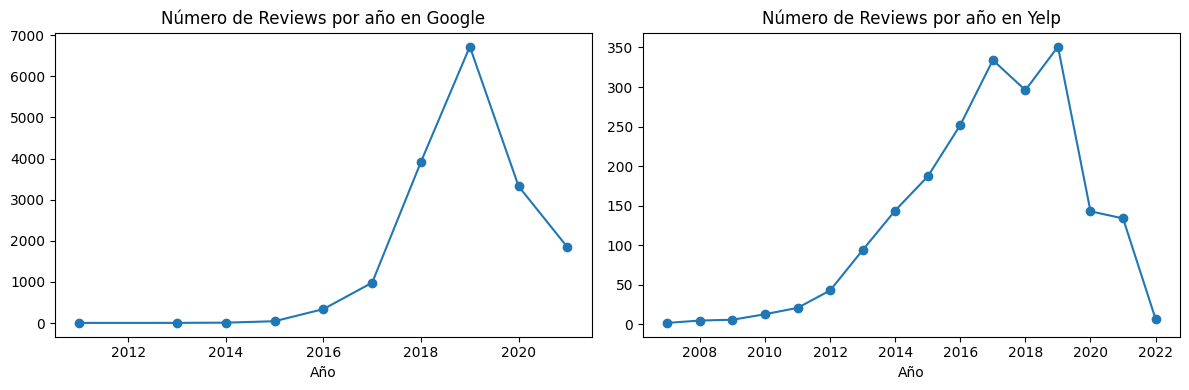

In [20]:
df_google_count_by_year =  G_ulta_beauty.groupby('year').size().reset_index(name='count')
df_yelp_count_by_year = Y_ulta_beauty.groupby('year').size().reset_index(name='count')

# Crear subplots
plt.figure(figsize=(12, 4))

# Subplot para Google
plt.subplot(1, 2, 1)
plt.plot(df_google_count_by_year['year'], df_google_count_by_year['count'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.title('Número de Reviews por año en Google')

# Subplot para Yelp
plt.subplot(1, 2, 2)
plt.plot(df_yelp_count_by_year['year'], df_yelp_count_by_year['count'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.title('Número de Reviews por año en Yelp')

# Ajustar diseño para evitar solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()


##### Google Reviews

En el caso de las reseñas en Google, se observa una clara tendencia al aumento del número de reseñas. El año pico fue 2019, marcando un máximo. Sin embargo, a partir de ese año, se evidencia un cambio de tendencia negativa, indicando una disminución en el número de reseñas a lo largo de los años siguientes.

##### Yelp Reviews

En contraste, las reseñas en Yelp presentan una dinámica diferente. Entre los años 2017 y 2018, se registra una disminución en el número de reseñas. Posteriormente, se observa un aumento para el año 2019. Sin embargo, esta tendencia positiva se revierte, revelando una disminución en el número de reseñas para el año 2020.


## Número de reseñas por geografía

In [24]:
import folium
from folium import plugins

# Crear un mapa centrado en las coordenadas iniciales
mapa = folium.Map(location=[G_ulta_beauty['latitude'].mean(), G_ulta_beauty['longitude'].mean()], zoom_start=12)

# Crear un MarkerCluster para agrupar círculos cercanos
marker_cluster = plugins.MarkerCluster().add_to(mapa)

# Agregar círculos al mapa
for index, row in G_ulta_beauty.iterrows():
    # Calcular el tamaño del círculo según la cantidad de filas dentro del círculo
    radio = len(G_ulta_beauty[(G_ulta_beauty['latitude'] == row['latitude']) & (G_ulta_beauty['longitude'] == row['longitude'])])

    # Crear un círculo con el tamaño calculado
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radio,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
mapa.save('../assets/mapa_circulos_agrupados_google.html')

![Numero_reseñas_estado_yelp.png](https://github.com/JohannaRangel/FinalProject_YelpGoogleMaps/blob/main/assets/Numero_rese%C3%B1as_estado.png)

En el mapa se observa el número de reseñas por estados en el dataset de google

In [25]:
# Crear un mapa centrado en las coordenadas iniciales
mapa = folium.Map(location=[Y_ulta_beauty['latitude'].mean(), Y_ulta_beauty['longitude'].mean()], zoom_start=12)

# Crear un MarkerCluster para agrupar círculos cercanos
marker_cluster = plugins.MarkerCluster().add_to(mapa)

# Agregar círculos al mapa
for index, row in Y_ulta_beauty.iterrows():
    # Calcular el tamaño del círculo según la cantidad de filas dentro del círculo
    radio = len(Y_ulta_beauty[(Y_ulta_beauty['latitude'] == row['latitude']) & (Y_ulta_beauty['longitude'] == row['longitude'])])

    # Crear un círculo con el tamaño calculado
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radio,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
mapa.save('../assets/mapa_circulos_agrupados_yelp.html')

![Numero_reseñas_estado_yelp.png](https://github.com/JohannaRangel/FinalProject_YelpGoogleMaps/blob/main/assets/Numero_rese%C3%B1as_estado_yelp.png)

En el mapa se observa el número de reseñas por estados en el dataset de yelp

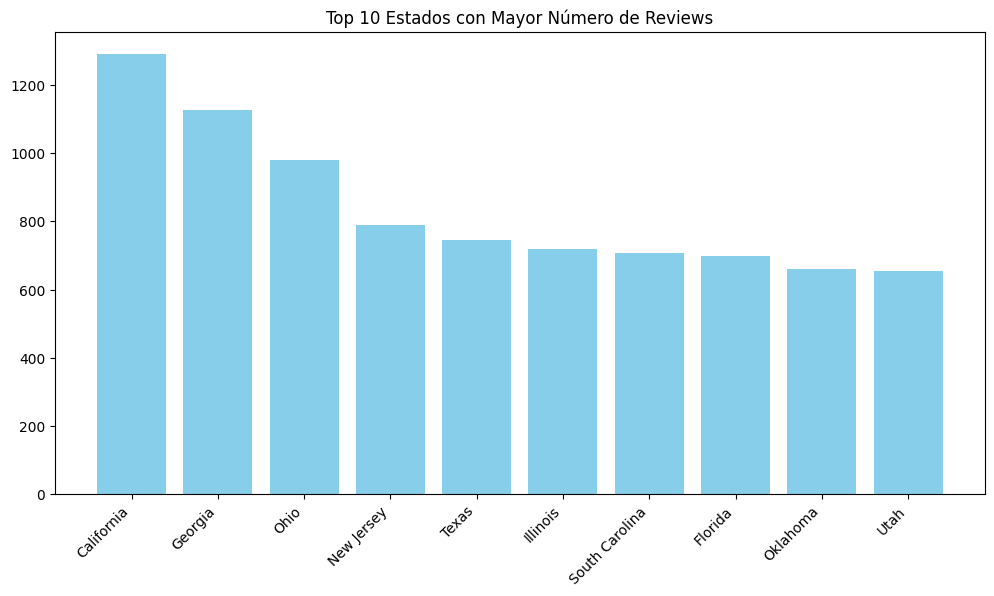

In [9]:
# Contar las filas por estado utilizando groupby y size
df_count_by_state = G_ulta_beauty.groupby('state').size().reset_index(name='count')

# Crear un diccionario de mapeo entre 'state' y 'state_name' en G_ulta_beauty
state_mapping = G_ulta_beauty.set_index('state')['state_name'].to_dict()

# Agregar la columna 'state_name' a df_count_by_state utilizando map
df_count_by_state['state_name'] = df_count_by_state['state'].map(state_mapping)

# Ordenar el DataFrame por el número de filas en orden descendente
df_count_by_state = df_count_by_state.sort_values(by='count', ascending=False)

# Seleccionar solo el top 10
df_top10_by_state = df_count_by_state.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top10_by_state['state_name'], df_top10_by_state['count'], color='skyblue')

# Añadir etiquetas y título
plt.title('Top 10 Estados con Mayor Número de Reviews')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

En el conjunto de datos de Google, se observa que los estados con el mayor número de reseñas son California, Georgia, Ohio y New Jersey. 

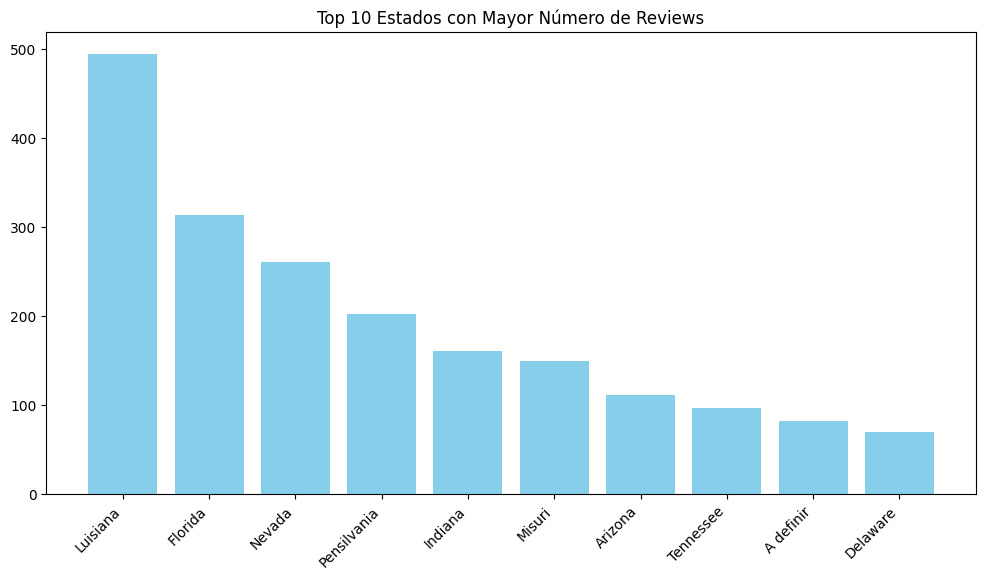

In [14]:
# Contar las filas por estado utilizando groupby y size
df_count_by_state = Y_ulta_beauty.groupby('state').size().reset_index(name='count')

# Crear un diccionario de mapeo entre 'state' y 'state_name' en G_ulta_beauty
state_mapping = Y_ulta_beauty.set_index('state')['state_name'].to_dict()

# Agregar la columna 'state_name' a df_count_by_state utilizando map
df_count_by_state['state_name'] = df_count_by_state['state'].map(state_mapping)

# Ordenar el DataFrame por el número de filas en orden descendente
df_count_by_state = df_count_by_state.sort_values(by='count', ascending=False)

# Seleccionar solo el top 10
df_top10_by_state = df_count_by_state.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top10_by_state['state_name'], df_top10_by_state['count'], color='skyblue')

# Añadir etiquetas y título
plt.title('Top 10 Estados con Mayor Número de Reviews')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

En el conjunto de datos de Yelp, los estados con el mayor número de reseñas son Luisiana, Florida, Nevada y Pensilvania

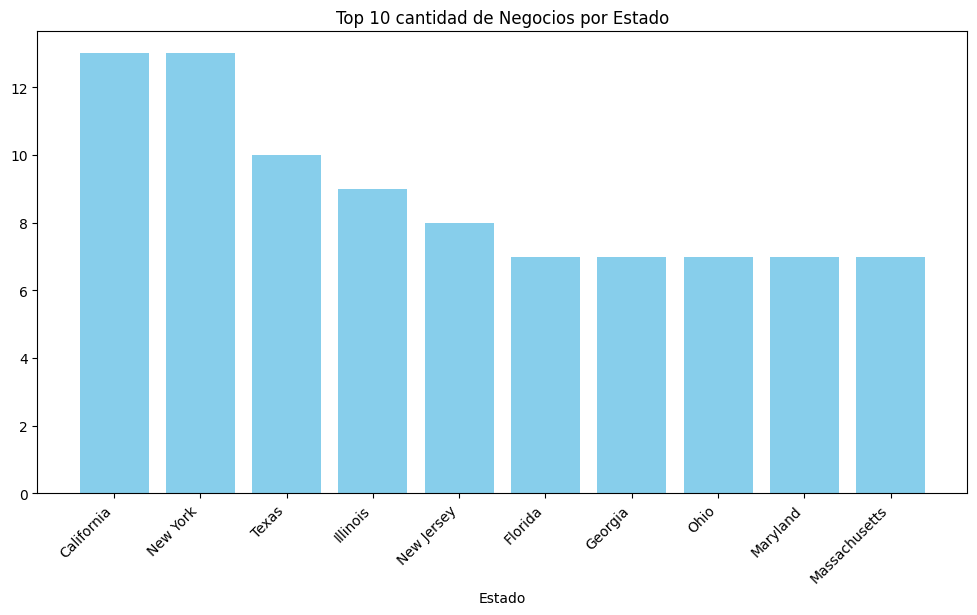

In [4]:
# Contar los business_id únicos por estado
df_unique_business_by_state = G_ulta_beauty.groupby('state')['business_id'].nunique().reset_index(name='unique_business_count')

# Crear un diccionario de mapeo entre 'state' y 'state_name' en G_ulta_beauty
state_mapping = G_ulta_beauty.set_index('state')['state_name'].to_dict()

# Agregar la columna 'state_name' a df_count_by_state utilizando map
df_unique_business_by_state['state_name'] = df_unique_business_by_state['state'].map(state_mapping)

# Ordenar el DataFrame por el número de business_id únicos en orden descendente
df_unique_business_by_state = df_unique_business_by_state.sort_values(by='unique_business_count', ascending=False)

# Seleccionar solo el top 10
df_top10_by_state = df_unique_business_by_state.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top10_by_state['state_name'], df_top10_by_state['unique_business_count'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.title('Top 10 cantidad de Negocios por Estado')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

En cuanto a la cantidad de negocios de Ulta Beauty,  los estados con la presencia más destacada de establecimientos de la marca son California, New York y Texas. 

C:\Users\PC GABRIEL VERON\AppData\Local\Temp\ipykernel_7104\2922054139.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10_by_state['state_name'][df_top10_by_state.state=='AB']='A definir'


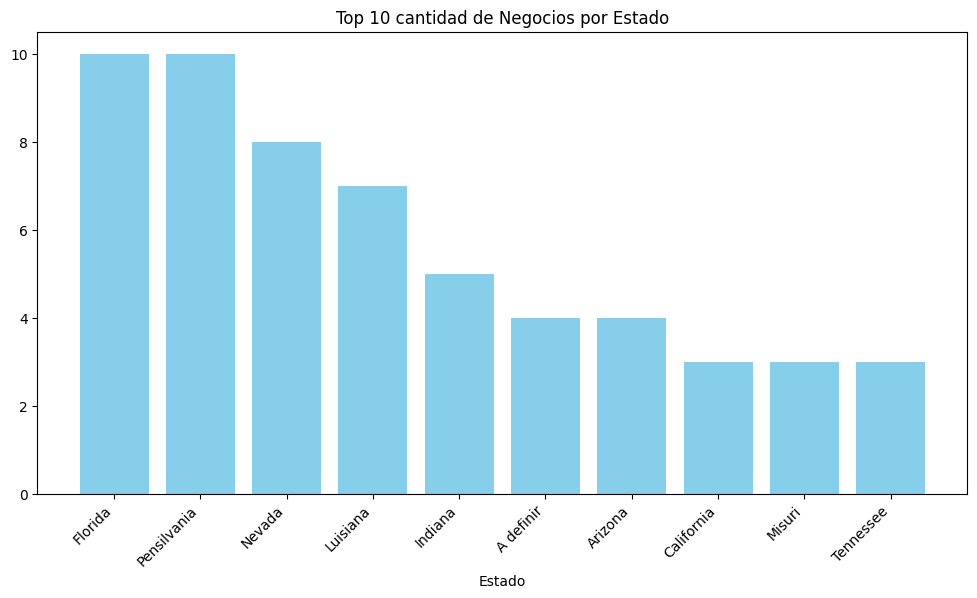

In [8]:
# Contar los business_id únicos por estado
df_unique_business_by_state = Y_ulta_beauty.groupby('state')['business_id'].nunique().reset_index(name='unique_business_count')

# Crear un diccionario de mapeo entre 'state' y 'state_name' en G_ulta_beauty
state_mapping = G_ulta_beauty.set_index('state')['state_name'].to_dict()

# Agregar la columna 'state_name' a df_count_by_state utilizando map
df_unique_business_by_state['state_name'] = df_unique_business_by_state['state'].map(state_mapping)

# Ordenar el DataFrame por el número de business_id únicos en orden descendente
df_unique_business_by_state = df_unique_business_by_state.sort_values(by='unique_business_count', ascending=False)

# Seleccionar solo el top 10
df_top10_by_state = df_unique_business_by_state.head(10)
df_top10_by_state['state_name'][df_top10_by_state.state=='AB']='A definir'

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_top10_by_state['state_name'], df_top10_by_state['unique_business_count'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.title('Top 10 cantidad de Negocios por Estado')

# Rotar etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

## Análisis temporal de las calificaciones

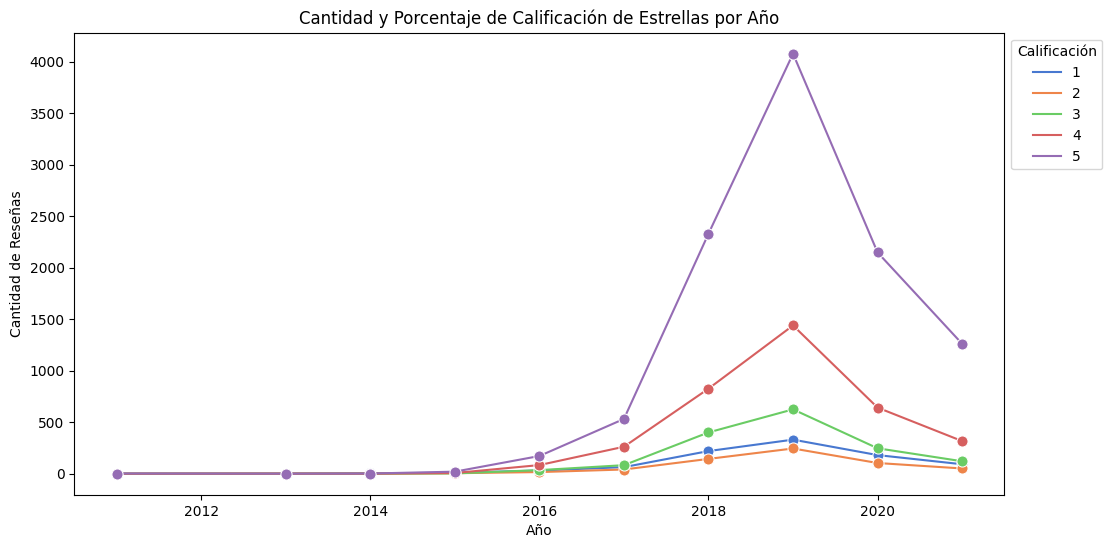

In [72]:
# Agrupar y contar las reseñas por año, estrellas
df_counts = G_ulta_beauty.groupby(['year', 'stars']).size().reset_index(name='count')

# Calcular el total de reseñas por año
df_total_by_year = df_counts.groupby('year')['count'].sum().reset_index(name='total_reviews')

# Fusionar los dataframes para tener el total en cada fila
df_counts = pd.merge(df_counts, df_total_by_year, on='year')

# Calcular el porcentaje de cada calificación por año
df_counts['percentage'] = (df_counts['count'] / df_counts['total_reviews']) * 100

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Utilizar lineplot para graficar el porcentaje de reseñas por año y estrellas
ax = sns.lineplot(data=df_counts, x='year', y='count', hue='stars', marker='o', markersize=8, palette='muted')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.title('Cantidad y Porcentaje de Calificación de Estrellas por Año')

# Mostrar la leyenda fuera del gráfico para mejor visualización
plt.legend(title='Calificación', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

Podemos notar un patrón interesante. Se observa un notable incremento en las calificaciones de 5 estrellas, indicando una mayor satisfacción por parte de los usuarios. Sin embargo, es importante señalar que las calificaciones de 1 y 2 estrellas también experimentaron un aumento, aunque de manera más moderada.

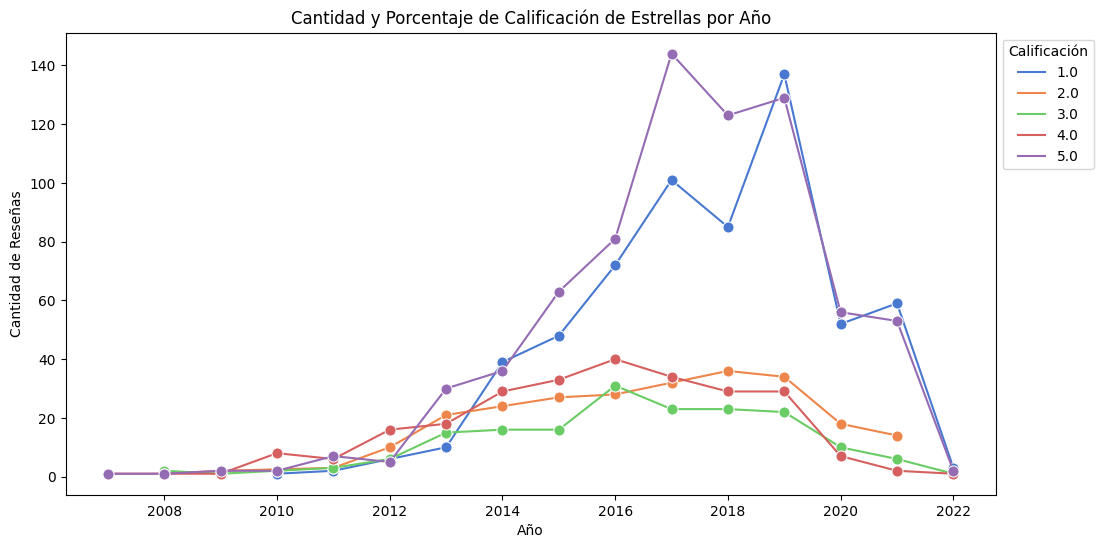

In [73]:
# Agrupar y contar las reseñas por año, estrellas
df_counts = Y_ulta_beauty.groupby(['year', 'stars']).size().reset_index(name='count')

# Calcular el total de reseñas por año
df_total_by_year = df_counts.groupby('year')['count'].sum().reset_index(name='total_reviews')

# Fusionar los dataframes para tener el total en cada fila
df_counts = pd.merge(df_counts, df_total_by_year, on='year')

# Calcular el porcentaje de cada calificación por año
df_counts['percentage'] = (df_counts['count'] / df_counts['total_reviews']) * 100

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Utilizar lineplot para graficar el porcentaje de reseñas por año y estrellas
ax = sns.lineplot(data=df_counts, x='year', y='count', hue='stars', marker='o', markersize=8, palette='muted')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.title('Cantidad y Porcentaje de Calificación de Estrellas por Año')

# Mostrar la leyenda fuera del gráfico para mejor visualización
plt.legend(title='Calificación', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

Al contrastar el conjunto de datos de Yelp con el de Google, se destaca una diferencia notable en las tendencias de calificación. Mientras que en el conjunto de datos de Google se observa una predominancia de reseñas de 5 estrellas, en Yelp encontramos una distribución más equilibrada entre calificaciones de 5 estrellas y 1 estrella.

Es interesante notar que, a diferencia de Google, en Yelp las calificaciones de 5 estrellas y 1 estrella muestran cifras similares, indicando que tanto las experiencias altamente positivas como las negativas son frecuentes. Además, se observa un patrón particular en el que estas dos categorías son las que han experimentado el mayor aumento en los últimos años.


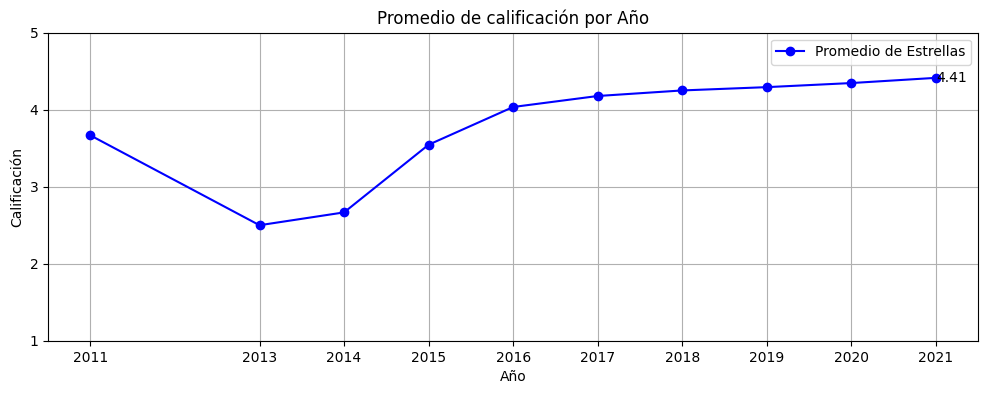

In [85]:
G_ulta_beauty['stars'] = pd.to_numeric(G_ulta_beauty['stars'], errors='coerce')
# Agrupar por año y calcular el promedio de estrellas
promedio_por_año = G_ulta_beauty.groupby('year')['stars'].mean()
# Crear un gráfico de línea mejorado
plt.figure(figsize=(12, 4))
plt.plot(promedio_por_año.index, promedio_por_año.values, marker='o', linestyle='-', color='b', label='Promedio de Estrellas')
plt.title('Promedio de calificación por Año')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.grid(True)
plt.legend()  # Agrega una leyenda
plt.xticks(promedio_por_año.index)  # Muestra todos los años en el eje x
plt.yticks(range(1, 6))  # Muestra todas las calificaciones posibles en el eje y
plt.ylim(1, 5)  # Limita el eje y al rango de calificaciones posibles
plt.text(promedio_por_año.index[-1], promedio_por_año.values[-1], f'{promedio_por_año.values[-1]:.2f}', ha='left', va='center', color='black', fontsize=10)  # Agrega etiqueta al último punto
plt.show()

En la gráfica, se aprecia claramente que a partir del año 2014, ha habido un incremento constante en el promedio de calificación de los usuarios año tras año en el conjunto de datos de Google.

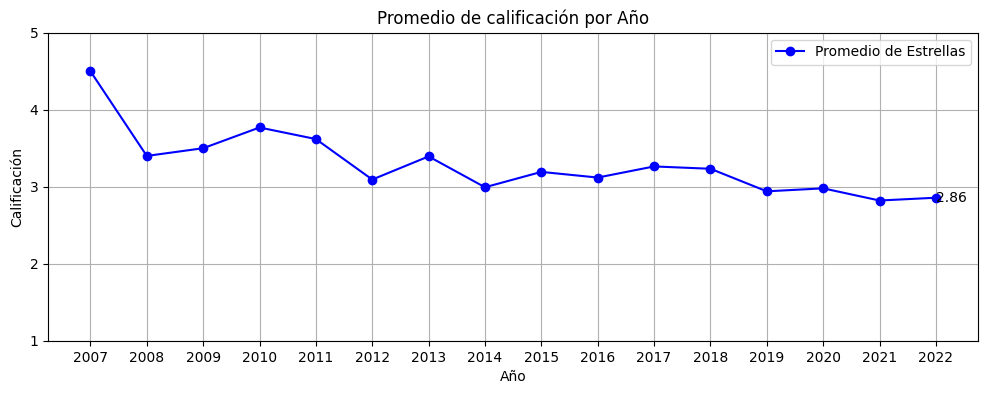

In [87]:
Y_ulta_beauty['stars'] = pd.to_numeric(Y_ulta_beauty['stars'], errors='coerce')
# Agrupar por año y calcular el promedio de estrellas
promedio_por_año = Y_ulta_beauty.groupby('year')['stars'].mean()
# Crear un gráfico de línea mejorado
plt.figure(figsize=(12, 4))
plt.plot(promedio_por_año.index, promedio_por_año.values, marker='o', linestyle='-', color='b', label='Promedio de Estrellas')
plt.title('Promedio de calificación por Año')
plt.xlabel('Año')
plt.ylabel('Calificación')
plt.grid(True)
plt.legend()  # Agrega una leyenda
plt.xticks(promedio_por_año.index)  # Muestra todos los años en el eje x
plt.yticks(range(1, 6))  # Muestra todas las calificaciones posibles en el eje y
plt.ylim(1, 5)  # Limita el eje y al rango de calificaciones posibles
plt.text(promedio_por_año.index[-1], promedio_por_año.values[-1], f'{promedio_por_año.values[-1]:.2f}', ha='left', va='center', color='black', fontsize=10)  # Agrega etiqueta al último punto
plt.show()

Contrastando con el conjunto de datos de Google, se observa una tendencia diferente en el caso de Yelp. En este caso, el promedio de calificación presenta una tendencia negativa a lo largo de los años. 

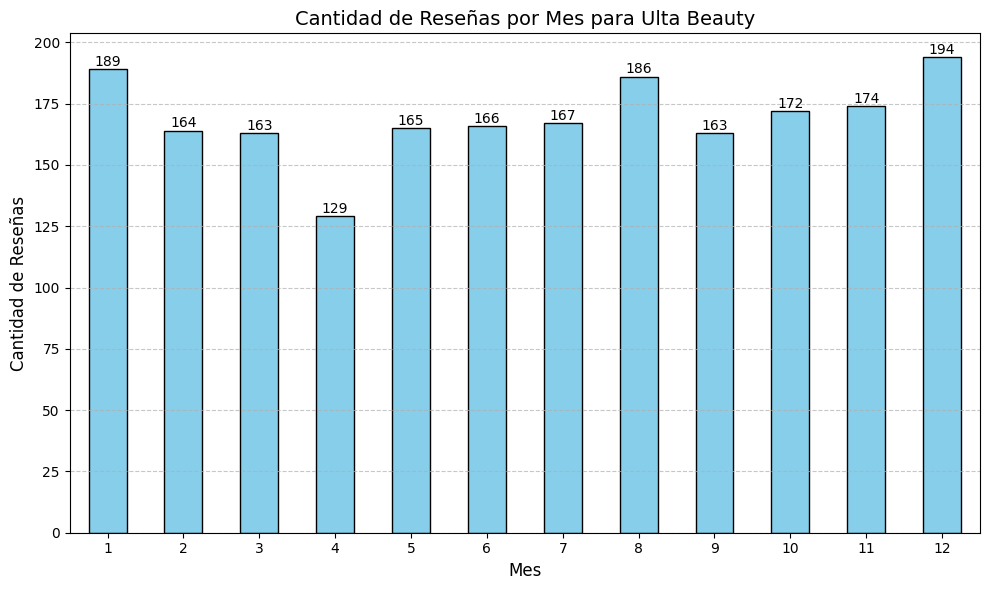

In [88]:
# Crear un gráfico de barras mejorado
plt.figure(figsize=(10, 6))
Y_ulta_beauty.groupby('month')['stars'].count().plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Cantidad de Reseñas por Mes para Ulta Beauty', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)

# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Agregar etiquetas de datos en las barras
for i, valor in enumerate(Y_ulta_beauty.groupby('month')['stars'].count()):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom', fontsize=10)

# Añadir una cuadrícula y ajustar el diseño
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Las reseñas para Ulta Beauty, se destaca que la cantidad de reseñas varía a lo largo del año. Es interesante observar que el mes con la mayor cantidad de reseñas es diciembre, alcanzando un total de 194, mientras que abril registra la menor cantidad con 129 reseñas. Aunque no se observa una tendencia clara en la distribución mensual, estos extremos resaltan la variabilidad en la participación de los usuarios a lo largo del año.

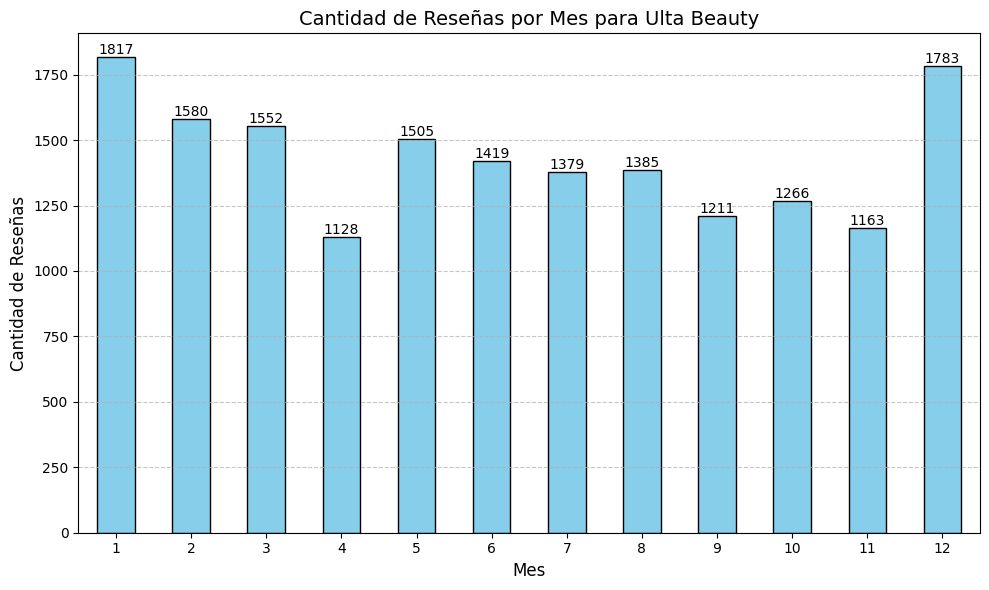

In [89]:
# Crear un gráfico de barras mejorado
plt.figure(figsize=(10, 6))
G_ulta_beauty.groupby('month')['stars'].count().plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Cantidad de Reseñas por Mes para Ulta Beauty', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)

# Rotar etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=0)

# Agregar etiquetas de datos en las barras
for i, valor in enumerate(G_ulta_beauty.groupby('month')['stars'].count()):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom', fontsize=10)

# Añadir una cuadrícula y ajustar el diseño
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En el contexto del conjunto de datos de Google, . Se destaca que el mes de enero con la máxima participación de usuarios, generando un total de 1817 reseñas. Por otro lado, se observa que el mes de abril presenta la menor cantidad de reseñas, registrando un total de 1128.

-------------------------------------------------------------------------